#### On diabetes Dataset perform
1. Import data

2. Descriptive statistics

3. Missing values anaalysis and tratment

4. Outlier analysis and treatment

5. EDA

6. Correlation
 

In [1]:
# Import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Dataset Overview and structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Insights

The dataset contains numeric features only.

No categorical variables are present.

Some columns have invalid zero values, which indicate missing data rather than true zeros.

In [3]:
# Descriptive Statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insights 

Mean and median values show right-skewness in features like Insulin and SkinThickness.

Zero values appear in columns such as:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

These zeros are medically impossible and represent missing data.

In [5]:
# Missing value Analysis

(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### Insights
The following columns contain missing values encoded as zero:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Outcome, Age, and Pregnancies have valid zero values.

In [6]:
# Handling Missing values

# Replace zeros with NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# Fill missing values with median
df[cols] = df[cols].fillna(df[cols].median())

# Check missing values again
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Insights
Median imputation is used because the data is skewed.

This prevents distortion caused by extreme values.

All missing values are now handled.

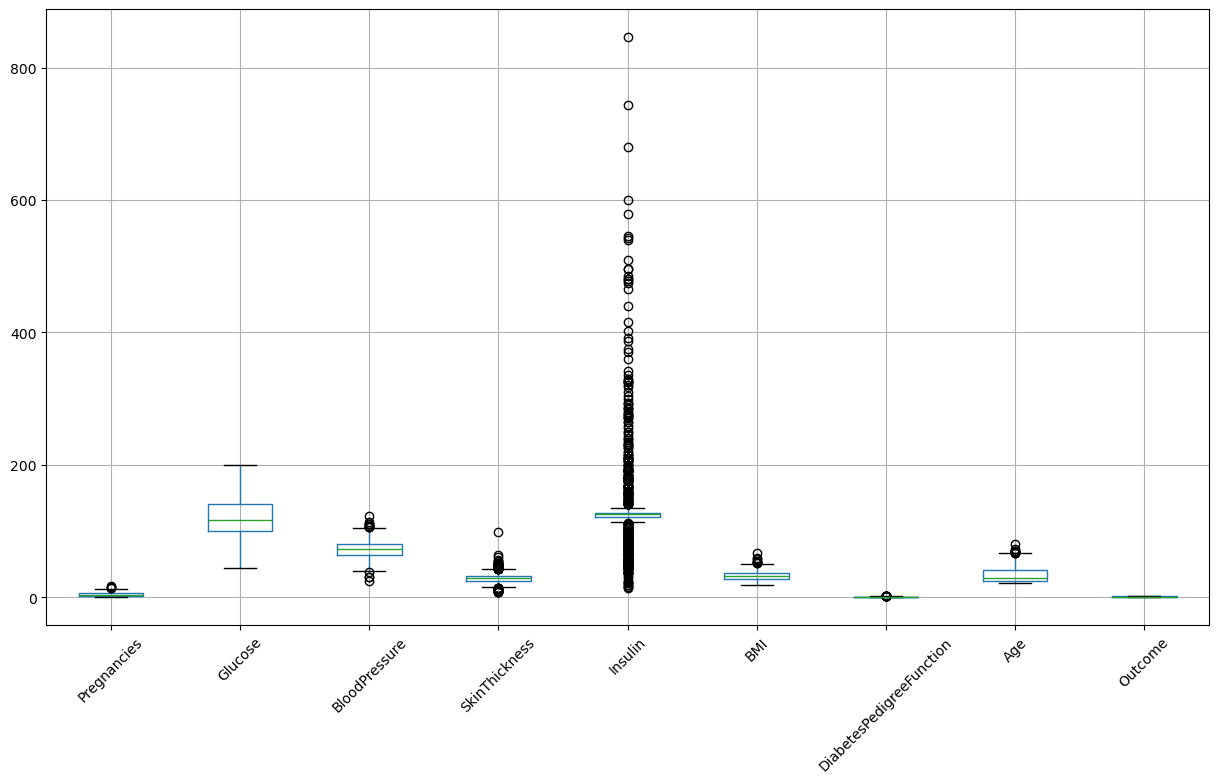

In [12]:
# Outlier Analysis (Box plot)

plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()


#### Insights

Significant outliers observed in:

Insulin

SkinThickness

BMI

These are common in medical datasets and can impact model performance.

In [8]:
# Outlier Treatment (IQR Method)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


#### Insights
Extreme outliers are removed to improve model stability.

Dataset size slightly reduces, improving data quality.

Prevents overfitting caused by abnormal values.

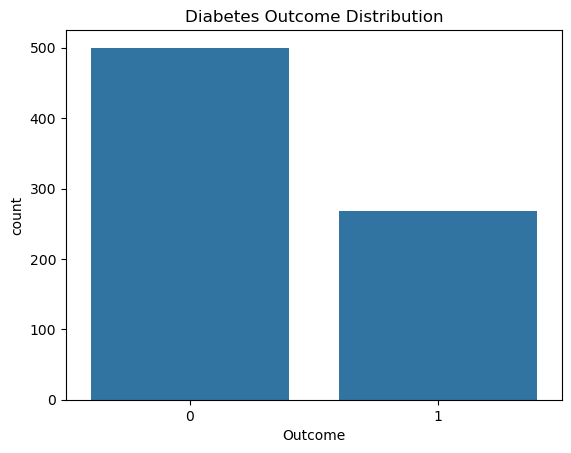

In [13]:
# Exploratory Data Analysis (EDA)
# Outcome Distribution

sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


#### Insights
The dataset is slightly imbalanced.

More non-diabetic cases than diabetic cases.

Resampling may be needed for modeling.

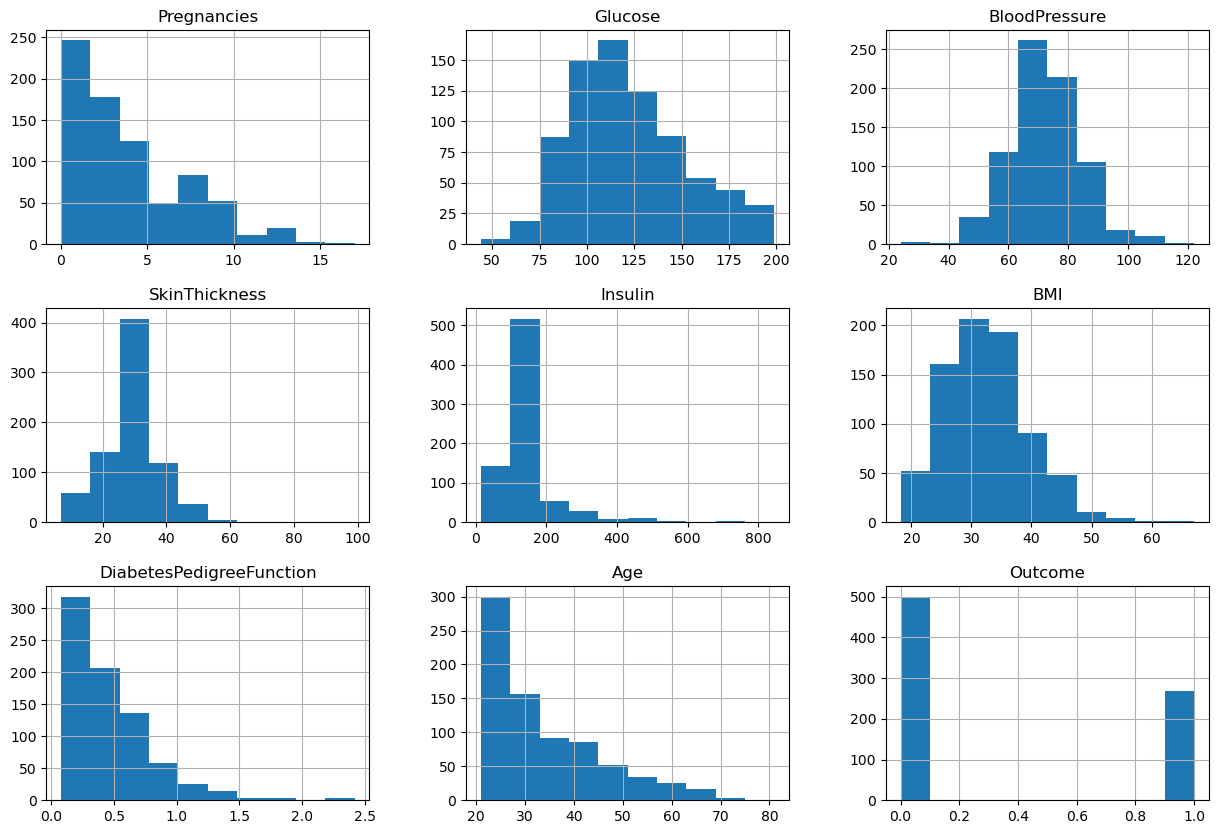

In [14]:
# Feature Distribution

df.hist(figsize=(15,10))
plt.show()


#### Insights
Glucose and BMI show clear separation trends.

Many variables are right-skewed.

Scaling will be required before modeling.

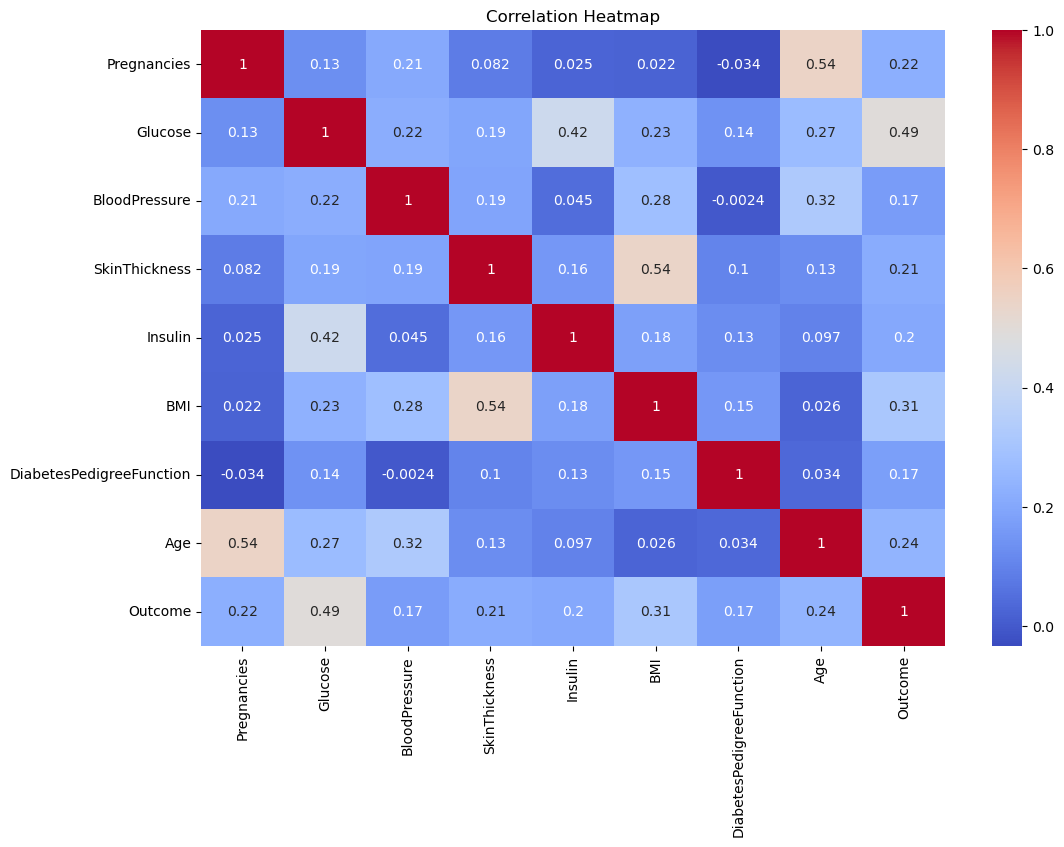

In [15]:
# Correlation Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Insights
Glucose has the highest positive correlation with Outcome.

BMI and Age also show moderate correlation.

No severe multicollinearity observed among predictors.